# Contexto

Na produção de cimento, o principal parâmetro de qualidade é a <b>resistência do concreto a compressão.</b>
<br>
Essa análise de qualidade leva em torno de <b>28 dias</b>  desde que o cimento é produzido, pois é necessário medir a compressão do concreto em diferentes idades. Essa análise é onerosa e elava muito o ciclo de produção do cimento. Portanto, Indústrias cimenteiras que não possuem um rigoroso padrão de qualidade e não são capazes de prever a resistência à compressão do cimento perdem bastante a competitividade no mercado.
<br>
Além disso, a resistência à compressão do concreto é um parâmetro importantíssimo para quem deseja usá-lo em obras , dessa forma, conhecer essa medida para diversas composições do concreto é muito útil.



 Sendo assim, a variável alvo do modelo a ser construido é a <b>resistência de compressão do concreto (em MPA)</b> e as variáveis de entrada do são:
- clinquer (medido em kg/m³)
- escoria (medido em kg/m³)
- cinzas (medido em kg/m³)
- agua (medido em kg/m³)
- superplastificante (medido em kg/m³)
- agragado grosso (medido em kg/m³)
- agregado fino (medido em kg/m³)
- idade (medido em dias 0 ~ 365 dias)

<h3> A imagem abaixo mostra um exemplo de teste de compressão do concreto </h3>

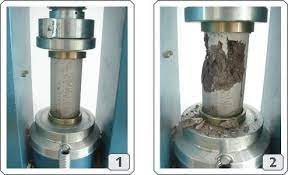

<h1>Lets Code!</h1>

## 1.Instalando as bibliotecas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import itertools

import time

# used to supress display of warnings
import warnings
# ols library
import statsmodels.api as sm
import statsmodels.formula.api as smf

import missingno as mno
from sklearn.cluster import DBSCAN
from sklearn.cluster import OPTICS

# import zscore for scaling the data
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer, RobustScaler

from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
# pre-processing methods
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

from sklearn.compose import TransformedTargetRegressor

# the regression models 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor

# cross-validation methods
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn import metrics

from sklearn.pipeline import Pipeline

# feature-selection methods
from sklearn.feature_selection import SelectFromModel

# bootstrap sampling
from sklearn.utils import resample

### 1.1 Definindo configurações padrões

In [2]:
# suppress display of warnings
warnings.filterwarnings('ignore')

# display all dataframe columns
pd.options.display.max_columns = None

# to set the limit to 3 decimals
pd.options.display.float_format = '{:.7f}'.format

# display all dataframe rows
pd.options.display.max_rows = None

## 2.Importando e conhecendo os dados

In [3]:
concrete_df = pd.read_csv("C:/Users/wesley.marques/Documents/Relatório de Estágio - Wesley/archive/concrete.csv")

In [4]:
concrete_df = concrete_df.rename(columns={'cement':'clinquer', 'slag': 'escoria', 'ash':'cinzas',
                            'water':'agua','superplastic':'superplastificante',
                            'coarseagg':'agragado grosso','fineagg':'agregado fino','age':'idade','strength':'resistencia'})

### 2.1 Conhecendo os dados

In [5]:
concrete_df.head()

,clinquer,escoria,cinzas,agua,superplastificante,agragado grosso,agregado fino,idade,resistencia
0,141.3000000,212.0000000,0.0000000,203.5000000,0.0000000,971.8000000,748.5000000,28,29.8900000
1,168.9000000,42.2000000,124.3000000,158.3000000,10.8000000,1080.8000000,796.2000000,14,23.5100000
2,250.0000000,0.0000000,95.7000000,187.4000000,5.5000000,956.9000000,861.2000000,28,29.2200000
3,266.0000000,114.0000000,0.0000000,228.0000000,0.0000000,932.0000000,670.0000000,28,45.8500000
4,154.8000000,183.4000000,0.0000000,193.3000000,9.1000000,1047.4000000,696.7000000,28,18.2900000


In [6]:
concrete_df.describe()

,clinquer,escoria,cinzas,agua,superplastificante,agragado grosso,agregado fino,idade,resistencia
count,1030.0000000,1030.0000000,1030.0000000,1030.0000000,1030.0000000,1030.0000000,1030.0000000,1030.0000000,1030.0000000
mean,281.1678641,73.8958252,54.1883495,181.5672816,6.2046602,972.9189320,773.5804854,45.6621359,35.8179612
std,104.5063645,86.2793417,63.9970042,21.3542186,5.9738414,77.7539540,80.1759801,63.1699116,16.7057420
min,102.0000000,0.0000000,0.0000000,121.8000000,0.0000000,801.0000000,594.0000000,1.0000000,2.3300000
25%,192.3750000,0.0000000,0.0000000,164.9000000,0.0000000,932.0000000,730.9500000,7.0000000,23.7100000
50%,272.9000000,22.0000000,0.0000000,185.0000000,6.4000000,968.0000000,779.5000000,28.0000000,34.4450000
75%,350.0000000,142.9500000,118.3000000,192.0000000,10.2000000,1029.4000000,824.0000000,56.0000000,46.1350000
max,540.0000000,359.4000000,200.1000000,247.0000000,32.2000000,1145.0000000,992.6000000,365.0000000,82.6000000


### 2.2 Tamanho do DataSet

In [7]:
concrete_df.shape

(1030, 9)

In [8]:
print("Número de linhas = {0} e número de colunas = {1} na base de dados".format(concrete_df.shape[0],concrete_df.shape[1]))

Número de linhas = 1030 e número de colunas = 9 na base de dados


### 2.3 Tipo de dados

Como mostrado abaixo, a maioria dos dados são <i>float64</i>, ou seja são números reais, exceto a idade do concreto que é um número inteiro

In [9]:
concrete_df.dtypes

clinquer              float64
escoria               float64
cinzas                float64
agua                  float64
superplastificante    float64
agragado grosso       float64
agregado fino         float64
idade                   int64
resistencia           float64
dtype: object

## 3.Limpeza dos dados

### 3.1 Checando se há valores duplicados

In [10]:
concrete_df.duplicated().sum()

25

In [11]:
duplicado = concrete_df.duplicated()
concrete_df[duplicado]

,clinquer,escoria,cinzas,agua,superplastificante,agragado grosso,agregado fino,idade,resistencia
278,425.0000000,106.3000000,0.0000000,153.5000000,16.5000000,852.1000000,887.1000000,3,33.4000000
298,425.0000000,106.3000000,0.0000000,153.5000000,16.5000000,852.1000000,887.1000000,3,33.4000000
400,362.6000000,189.0000000,0.0000000,164.9000000,11.6000000,944.7000000,755.8000000,3,35.3000000
420,362.6000000,189.0000000,0.0000000,164.9000000,11.6000000,944.7000000,755.8000000,3,35.3000000
463,362.6000000,189.0000000,0.0000000,164.9000000,11.6000000,944.7000000,755.8000000,56,77.3000000
468,252.0000000,0.0000000,0.0000000,185.0000000,0.0000000,1111.0000000,784.0000000,28,19.6900000
482,425.0000000,106.3000000,0.0000000,153.5000000,16.5000000,852.1000000,887.1000000,91,65.2000000
493,362.6000000,189.0000000,0.0000000,164.9000000,11.6000000,944.7000000,755.8000000,91,79.3000000
517,425.0000000,106.3000000,0.0000000,153.5000000,16.5000000,852.1000000,887.1000000,56,64.3000000
525,362.6000000,189.0000000,0.0000000,164.9000000,11.6000000,944.7000000,755.8000000,28,71.3000000


#### 3.1.1Apagando os dados duplicados

In [12]:
concrete_df.drop_duplicates(inplace=True)
concrete_df.shape

(1005, 9)

## 3.2 Procurando Outliers

### 3.2.1 Plotando um boxplot

In [13]:
concrete_df.columns

Index(['clinquer', 'escoria', 'cinzas', 'agua', 'superplastificante',
       'agragado grosso', 'agregado fino', 'idade', 'resistencia'],
      dtype='object')

<AxesSubplot:>

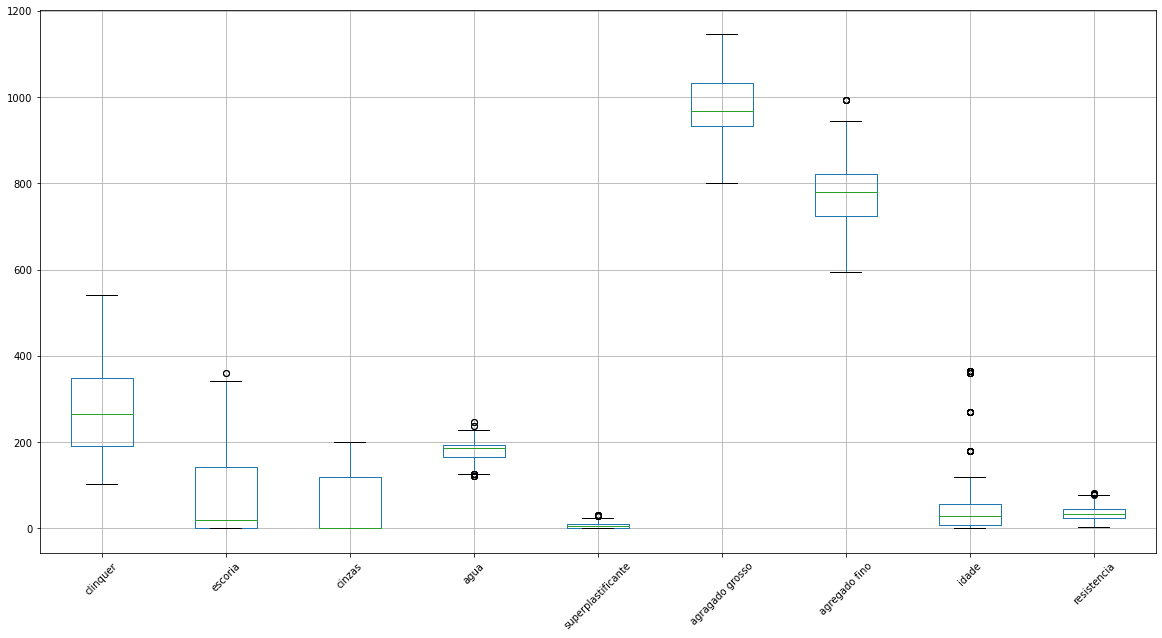

In [14]:
concrete_df.boxplot(column = ['clinquer', 'escoria', 'cinzas', 'agua', 'superplastificante',
       'agragado grosso', 'agregado fino', 'idade', 'resistencia'], rot=45, figsize = (20,10))

Outliers são dados que se diferenciam drasticamente dos demais e podem ser causados por diversos tipos de erros. Considerar um outliers para treinar o modelo pode levar a erros drásticos, logo estes devem ser apagados ou substituidos.

Dessa forma, como mostrado na figura acima, os dados sobre a escória, água, superplastificante, agregado fino, idade e resistência apresentam outliers e devem ser retirados da amostra. Para fazer isso, foi calculado o <i>IQR SCORE</i> que é a diferença entre o quartil 1 e o quartil 3. Depois disso, foi substituido todos os dados que estivessem abaixo de <i>Q1 - 1.5*IQR</i>, por <i>Q1 - 1.5*IQR</i> e acima de <i>Q3 + 1.5*IQR</i>, por <i>Q3 + 1.5*IQR</i>.

<b>OBS:</b> A escolha de substituir os dados, ao invés de apagá-los é porque o dataset é relativamente pequeno, assim eliminar muitos dados, podem prejudicar a integridade do modelo.

In [15]:
concrete_df_outliers = pd.DataFrame(concrete_df.loc[:,])

# Calculando IQR
Q1 = concrete_df_outliers.quantile(0.25)
Q3 = concrete_df_outliers.quantile(0.75)
IQR = Q3 - Q1

print(IQR)

clinquer             158.3000000
escoria              142.5000000
cinzas               118.3000000
agua                  26.3000000
superplastificante    10.0000000
agragado grosso       99.0000000
agregado fino         97.9000000
idade                 49.0000000
resistencia           21.3500000
dtype: float64


In [16]:
#Usaremos o IQR score para filtrar os dados Outliers, retirando dados que estiverem acima de Q3 + 1.5IQR e abaixo de Q1 - 1.5IQR

# Foi substituido os Outliers acima de Q3 + 1.5*IQR por Q3 + 1.5*IQR - para as colunas: 'agua', 'superplastico', 
# 'agregado fino', 'idade' e 'resistencia'
for i, j in zip(np.where(concrete_df_outliers > Q3 + 1.5 * IQR)[0], np.where(concrete_df_outliers > Q3 + 1.5 * IQR)[1]):
    
    troca  = Q3 + 1.5 * IQR
    concrete_df_outliers.iloc[i,j] = troca[j]
    
# Foi substituido os Outliers abaixo de Q1 - 1.5*IQR por Q1 - 1.5*IQR para a coluna de água
for i, j in zip(np.where(concrete_df_outliers < Q1 - 1.5 * IQR)[0], np.where(concrete_df_outliers < Q1 - 1.5 * IQR)[1]): 
    
    troca  = Q1 - 1.5 * IQR
    concrete_df_outliers.iloc[i,j] = troca[j]

In [17]:
# Removendo outliers das colunas - 'agua', 'superplastico', 'agregado fino', 'idade', 'agua' e 'resistencia'
concrete_df.drop(columns = concrete_df.loc[:,], inplace = True)

In [18]:
# Aadicionando as colunas acima sem outliers da concrete_df_outliers to para concret_df
concrete_df = pd.concat([concrete_df, concrete_df_outliers], axis = 1)

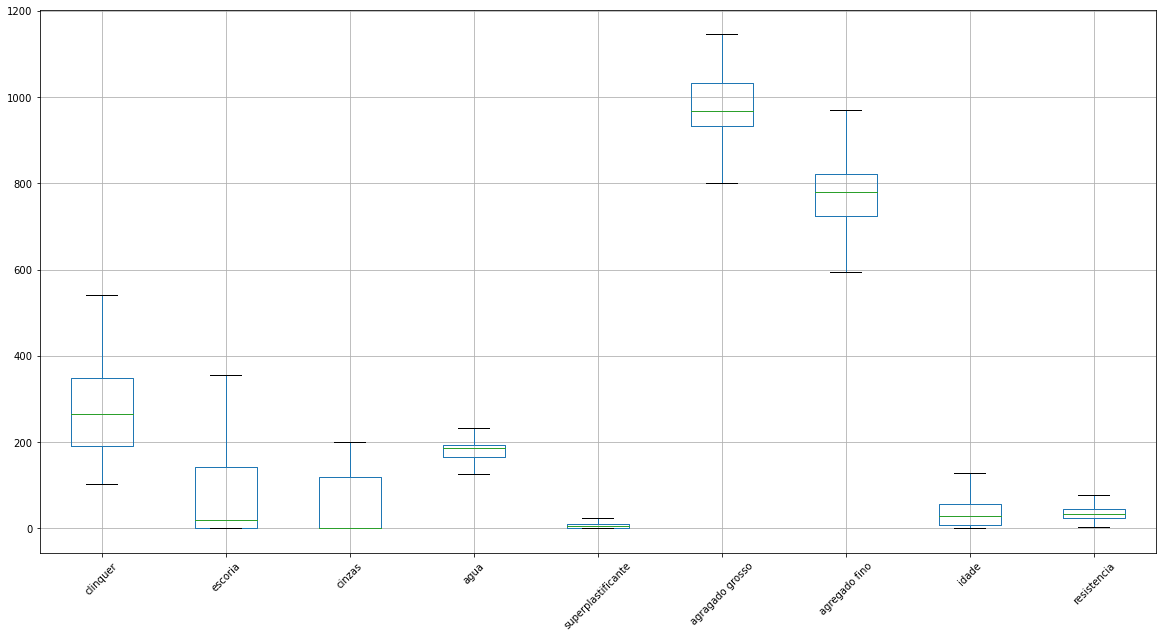

In [19]:
concrete_df.boxplot(column = ['clinquer', 'escoria', 'cinzas', 'agua', 'superplastificante',
       'agragado grosso', 'agregado fino', 'idade', 'resistencia'], rot=45, figsize = (20,10));

Como observado acima, <b>não</b> há mais outliers nos dados.

### 3.3 Checando valores nulos

In [20]:
concrete_df.isnull().sum()

clinquer              0
escoria               0
cinzas                0
agua                  0
superplastificante    0
agragado grosso       0
agregado fino         0
idade                 0
resistencia           0
dtype: int64

<b>Não</b> há dados nulos no data set

#### Resumo sobre a limpeza dos dados
- Houveram 25 valores duplicados que foram apagados;
- Houveram Outliers nas colunas: 'agua', 'superplastico', 'agregado fino', 'idade', 'resistência'. Tais dados foram substituidos pelo limite outlier superior ou inferior;
- Não houve valores nulos no dataset;


## 4.Análise e preparação dos dados

### 4.1 Análise univariada

Aqui, estamos procurando como os dados estão destribuidos.

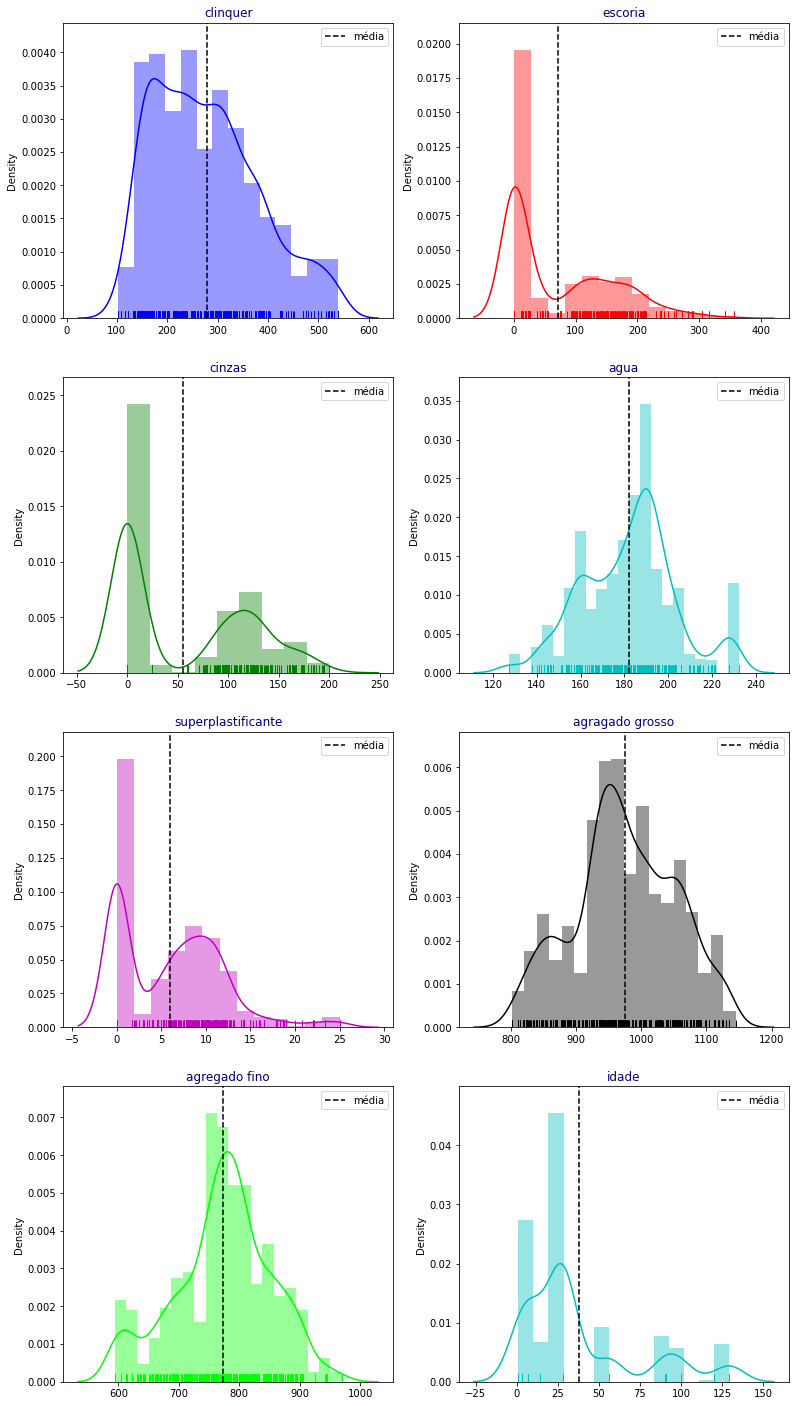

In [21]:
cols = [i for i in concrete_df.columns if i not in 'resistencia']
length = len(cols)
cs = ["b","r","g","c","m","k","lime","c"]
fig = plt.figure(figsize=(13,25))

for i,j,k in itertools.zip_longest(cols,range(length),cs):
    plt.subplot(4,2,j+1)
    ax = sns.distplot(concrete_df[i],color=k,rug=True)
    ax.set_facecolor("w")
    plt.axvline(concrete_df[i].mean(),linestyle="dashed",label="média",color="k")
    plt.legend(loc="best")
    plt.title(i,color="navy")
    plt.xlabel("")

A partir da análise univariada dos dados, nota-se a existência de no mínimo duas gaussianas na distribuição de dados referentes a <i>escória</i>, <i>cinzas</i>,<i>superplastificantes</i> e <i>agua</i>. Sendo assim, permite-se afirmar que no <i>dataset</i> há no mínimo 2 e no máximo 6 conjuntos de dados que podem ser separados facilmente.

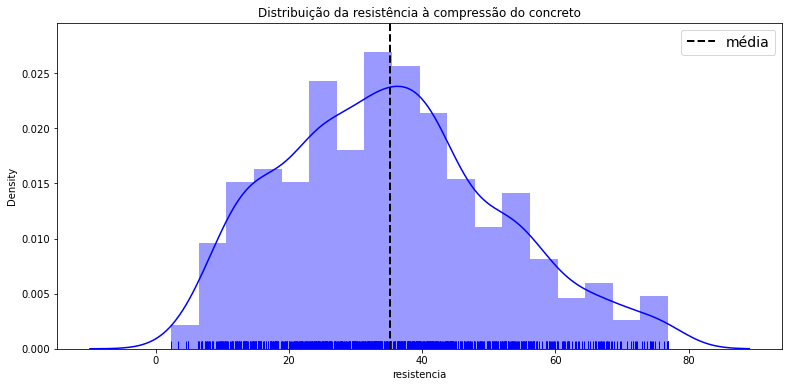

In [22]:
plt.figure(figsize=(13,6))
sns.distplot(concrete_df["resistencia"],color="b",rug=True)
plt.axvline(concrete_df["resistencia"].mean(), linestyle="dashed",color="k", label='média',linewidth=2)
plt.legend(loc="best",prop={"size":14})
plt.title("Distribuição da resistência à compressão do concreto")
plt.show()

A análise univariada de distribuição referente aos dados de resistência de compressão do contreto mostra dados bem destribuidos.

### 4.2 Análise de correlação entre os dados

A análise de correlação mede o grau de dependência entre as variáveis, ou seja, o quanto uma variável interfere na outra, podendo ser uma relação ser uma correlação positiva ou negativa. As variáveis muito correlacionadas entre si, ou seja, que possuem correlações próximas de 1 ou -1, fornecem a mesma informação para o algorítimo, sendo uma delas dispensáveis. Nesses casos, pode-se manter uma variável e excluir outra, ou ainda combinar as duas variáveis em uma só. Geralmente, essa decisão é tomada de acordo com a dificuldade em medir a variável.

Já variáveis que possuem relação muito próxima de 0 em relação à variável <i> target </i> do modelo, também é dispensável, pois trás pouca informação.

##### Gráfico de calor

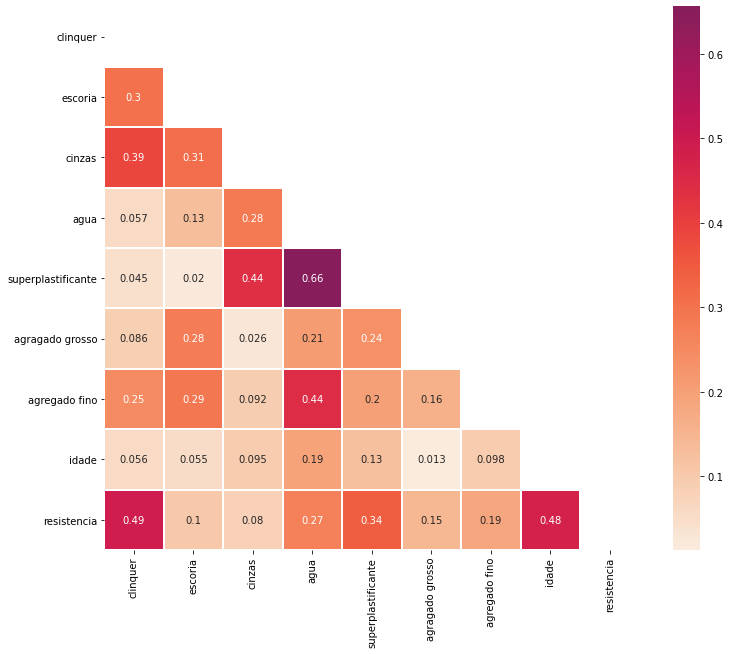

In [23]:
corr = abs(concrete_df.corr()) # Matriz de correlaçao
lower_triangle = np.tril(corr, k = -1)  # seleciona o menor triangula da matriz
mask = lower_triangle == 0 # Apaga a diagonal do mapa de calor, pois a diagonal sempre seré 1
#coolwarm
#rocket
plt.figure(figsize = (12,10))
sns.heatmap(lower_triangle, center = 0.5, cmap = 'rocket_r', annot= True, xticklabels = corr.index, yticklabels = corr.columns,
            cbar= True, linewidths= 1, mask = mask)   # mapa de calor
plt.show()

De acordo com o gráfico acima, nota-se que o clínquer, água, superplastificante e a idade possuem uma correlação relativamente grande com a resistência à compressão do concreto. Portanto, são considerados boas variáveis preditoras para o modelo.

## 5. Separando os dados em treino e teste

In [24]:
X = concrete_df.drop('resistencia',axis=1)
y = concrete_df['resistencia']

A separação foi na proporção <b>70:30</b> (treino/teste)

In [25]:
X_train, X_test,y_train,y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

In [26]:
print(f'Xtreino:{X_train.shape}')
print(f'ytreino:{y_train.shape}')
print(f'Xteste:{X_test.shape}')
print(f'yteste:{y_test.shape}')

Xtreino:(703, 8)
ytreino:(703,)
Xteste:(302, 8)
yteste:(302,)


### 5.1 Criando uma função geral para testar todos os modelos

In [27]:
def train_test_model(model, method, X_train, X_test, y_train, y_test, of_type, index, scale):
    
    print (f'Modelo: {model}')
    print ("--------------------------------------------------------")
    
    if scale == 'yes':
        # prepare the model with input scaling
        pipeline = Pipeline([('scaler', PowerTransformer()), ('model', model)])
    elif scale == 'no':
        # prepare the model with input scaling
        pipeline = Pipeline([('model', model)])

    pipeline.fit(X_train, y_train) # Fit the model on Training set
    prediction = pipeline.predict(X_test) # Predict on Test set

    r2 = metrics.r2_score(y_test, prediction) # Calculate the r squared value on the Test set
    rmse = np.sqrt(metrics.mean_squared_error(y_test, prediction)) # Root mean squared error
    
    if of_type == "coef":
        # Intercept and Coefficients
        print("A interceptação do modelo é: {}".format(model.intercept_), "\n")
        
        for idx, col_name in enumerate(X_train.columns):
            print("O coeficiente para {} é: {}".format(col_name, model.coef_.ravel()[idx]))
    
    # Accuracy of Training data set
    train_accuracy_score = pipeline.score(X_train, y_train)
    
    # Accuracy of Test data set
    test_accuracy_score = pipeline.score(X_test, y_test)
    
    print ("--------------------------------------------------------")
    
    if of_type == "coef":
        
        # FEATURE IMPORTANCES plot
        plt.figure(figsize=(13,12))
        plt.subplot(211)
        print(model.coef_)
        coef = pd.DataFrame(np.sort(model.coef_)[::-1].ravel())
        coef["feat"] = X_train.columns
        ax1 = sns.barplot(coef["feat"],coef[0],palette="jet_r", linewidth=2)
        ax1.set_facecolor("white")
        ax1.axhline(0,color="k",linewidth=2)
        plt.ylabel("coeficientes")
        plt.xlabel("variáveis")
        plt.title(method + ' ' + 'IMPORTÂNCIA DE CADA VARIÁVEL')
    
    elif of_type == "feat":
        
        # FEATURE IMPORTANCES plot
        plt.figure(figsize=(13,12))
        plt.subplot(211)
        coef = pd.DataFrame(np.sort(model.feature_importances_)[::-1])
        coef["feat"] = X_train.columns
        ax2 = sns.barplot(coef["feat"], coef[0],palette="jet_r", linewidth=2)
        ax2.set_facecolor("lightgrey")
        ax2.axhline(0,color="k",linewidth=2)
        plt.ylabel("coefficients")
        plt.xlabel("features")
        plt.title(method + ' ' + 'FEATURE IMPORTANCES')
    
    # Store the accuracy results for each model in a dataframe for final comparison
    resultsDf = pd.DataFrame({'Método': method, 'R²': r2, 'RMSE': rmse, 'Acurácia Treino': train_accuracy_score, 
                              'Acurácia Teste': test_accuracy_score}, index=[index])
    
    return resultsDf  # return all the metrics along with predictions

Treino e teste de todos os modelos

In [28]:
def train_test_allmodels(X_train_common, X_test_common, y_train, y_test, scale):
    # define regressor models
    models=[['LinearRegression',LinearRegression()],
        ['Ridge',Ridge(random_state = 0)],
        ['Lasso',Lasso(random_state = 0)],
        ['KNeighborsRegressor',KNeighborsRegressor(n_neighbors = 3)],
        ['SVR',SVR(kernel = 'linear')],
        ['RandomForestRegressor',RandomForestRegressor(random_state = 0)],
        ['BaggingRegressor',BaggingRegressor(random_state = 0)],
        ['ExtraTreesRegressor',ExtraTreesRegressor(random_state = 0)],
        ['AdaBoostRegressor',AdaBoostRegressor(random_state = 0)],
        ['GradientBoostingRegressor',GradientBoostingRegressor(random_state = 0)],
        ['CatBoostRegressor',CatBoostRegressor(random_state = 0, verbose=False)],
        ['XGBRegressor',XGBRegressor()]
    ]

    resultsDf_common = pd.DataFrame()
    i = 1
    for name, regressor in models:
        # Train and Test the model
        reg_resultsDf = train_test_model(regressor, name, X_train_common, X_test_common, y_train, y_test, 'none', i, scale)

        # Store the accuracy results for each model in a dataframe for final comparison
        resultsDf_common = pd.concat([resultsDf_common, reg_resultsDf])
        i = i+1

    return resultsDf_common

Ajuste dos Hiperparâmetros

In [29]:
def hyperparameterstune_model(name, model, X_train, y_train, param_grid):
    
    start = time.time()  # note the start time 
    
    # define grid search
    cv = KFold(n_splits=10, random_state=None)
    #grid_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=100, n_jobs=-1, cv=cv, 
                                     #scoring = 'neg_root_mean_squared_error', error_score=0)
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv, 
                                     scoring = 'neg_root_mean_squared_error', error_score=0)
    model_grid_result = grid_search.fit(X_train, y_train)

    # summarize results
    print(name, "- Least: RMSE %f using %s" % (model_grid_result.best_score_ * (-1), model_grid_result.best_params_))
    
    end = time.time()  # note the end time
    duration = end - start  # calculate the total duration
    print("Total duration" , duration, "\n")
    
    return model_grid_result.best_estimator_

### 5.2 Usando os modelo lineares (Linear, Lasso, Ridge)

#### 5.2.1 Linear

In [30]:
# Criando o modelo
lr = LinearRegression()
                                                     
# Treino e teste do modelo
resultsDf = train_test_model(lr, 'LinearRegression', X_train, X_test, y_train, y_test, 'none', 1, 'no')

resultsDf

Modelo: LinearRegression()
--------------------------------------------------------
--------------------------------------------------------


,Método,R²,RMSE,Acurácia Treino,Acurácia Teste
1,LinearRegression,0.7037271,8.6840742,0.7266022,0.7037271


O modelo ajusta-se um pouco melhor no treino do que no teste, indicando um leve <i>Overfitting</i>

#### 5.2.2 Ridge

Modelo: Ridge(random_state=0)
--------------------------------------------------------
A interceptação do modelo é: 35.75566145092462 

O coeficiente para clinquer é: 8.801420734208957
O coeficiente para escoria é: 5.18008338833721
O coeficiente para cinzas é: 0.996549193942585
O coeficiente para agua é: -4.973031610243944
O coeficiente para superplastificante é: 1.7694829426244285
O coeficiente para agragado grosso é: -0.46137451027949666
O coeficiente para agregado fino é: -1.3421593268157035
O coeficiente para idade é: 9.820003650724749
--------------------------------------------------------
[ 8.80142073  5.18008339  0.99654919 -4.97303161  1.76948294 -0.46137451
 -1.34215933  9.82000365]


,Método,R²,RMSE,Acurácia Treino,Acurácia Teste
1,LinearRegression,0.7037271,8.6840742,0.7266022,0.7037271
2,Ridge,0.8045394,7.0535418,0.8126396,0.8045394


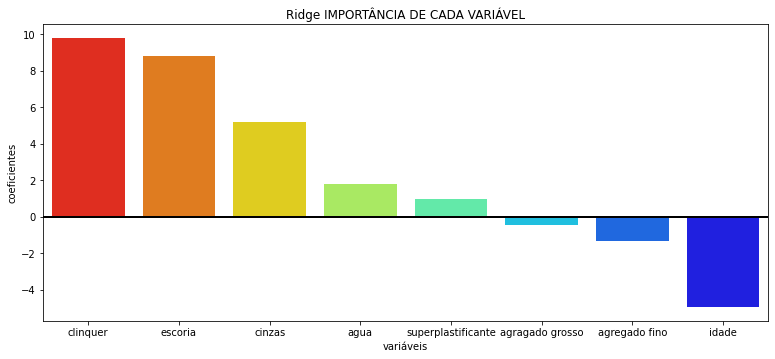

In [31]:
# Construindo o modlo
rr = Ridge(random_state = 0)

# Treinando e testando o modelo
rr_resultsDf = train_test_model(rr, 'Ridge', X_train, X_test, y_train, y_test, 'coef', 2, 'yes')

# Fazendo a comparação entre as métricas do modelo linear e ridge
resultsDf = pd.concat([resultsDf,rr_resultsDf])
resultsDf

#### 5.2.3 Lasso

Modelo: Lasso(random_state=0)
--------------------------------------------------------
A interceptação do modelo é: 35.75566145092462 

O coeficiente para clinquer é: 7.591398429537514
O coeficiente para escoria é: 3.9094880908728005
O coeficiente para cinzas é: 0.0
O coeficiente para agua é: -2.9227949557577695
O coeficiente para superplastificante é: 2.618825573472385
O coeficiente para agragado grosso é: -0.0
O coeficiente para agregado fino é: -0.15765063519307626
O coeficiente para idade é: 8.755073197446395
--------------------------------------------------------
[ 7.59139843  3.90948809  0.         -2.92279496  2.61882557 -0.
 -0.15765064  8.7550732 ]


,Método,R²,RMSE,Acurácia Treino,Acurácia Teste
1,LinearRegression,0.7037271,8.6840742,0.7266022,0.7037271
2,Ridge,0.8045394,7.0535418,0.8126396,0.8045394
3,Lasso,0.7741950,7.5813122,0.7884693,0.7741950


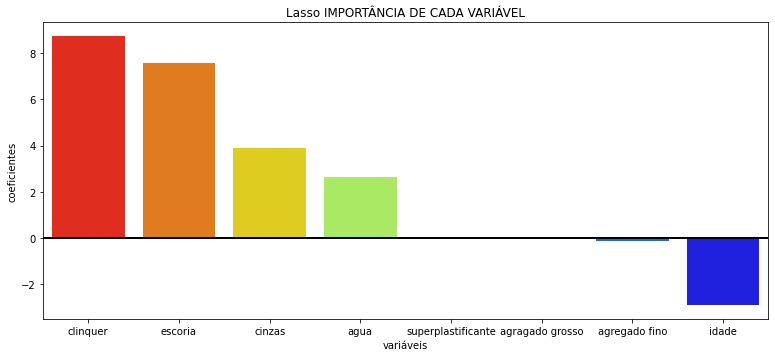

In [32]:
# Constrindo o modelo
lasso = Lasso(random_state = 0)

# Treino e teste do modelo
lasso_resultsDf = train_test_model(lasso, 'Lasso', X_train, X_test, y_train, y_test, 'coef', 3, 'yes')

# Concatenando todos os resultados
resultsDf = pd.concat([resultsDf, lasso_resultsDf])
resultsDf

### 5.3 Modelo polinomial

Polinômios de grau 1 a 5

In [33]:
resultsDf_poly = pd.DataFrame(columns=['Método','R²','RMSE','Acurácia Treino','Acurácia Teste'])
for i in range(1,6):
    pipe = Pipeline([('scaler', PowerTransformer()), ('polynomial', PolynomialFeatures(degree = i)), 
                 ('model', LinearRegression())]) # Criando a pipiline
    pipe.fit(X_train, y_train) # Treinando o modelo
    prediction = pipe.predict(X_test) # Testando o modelo
    method = f'Polinomio {i}° grau'
    r2 = metrics.r2_score(y_test, prediction) # Calculando r²
    rmse = np.sqrt(metrics.mean_squared_error(y_test, prediction)) # RMSE
    train_accuracy_score = pipe.score(X_train, y_train) # Acurácia nos dados de treino
    test_accuracy_score = pipe.score(X_test, y_test) # Acurácia nos dados de teste
    
    resultsDf_poly = resultsDf_poly.append({'Método': method, 'R²': r2, 'RMSE': rmse, 'Acurácia Treino': train_accuracy_score, 
                              'Acurácia Teste': test_accuracy_score},ignore_index=True)
    
resultsDf_poly

,Método,R²,RMSE,Acurácia Treino,Acurácia Teste
0,Polinomio 1° grau,0.8045347,7.0536265,0.8126429,0.8045347
1,Polinomio 2° grau,0.8545316,6.0850193,0.8844317,0.8545316
2,Polinomio 3° grau,0.8646840,5.8688388,0.9484564,0.8646840
3,Polinomio 4° grau,-74.5252993,138.6512539,0.9914714,-74.5252993
4,Polinomio 5° grau,-180906476761501440.0000000,6785855879.2165422,0.9949591,-180906476761501440.0000000


Todos os Modelos até agora

In [34]:
resultsDf = pd.concat([resultsDf, resultsDf_poly])
resultsDf

,Método,R²,RMSE,Acurácia Treino,Acurácia Teste
1,LinearRegression,0.7037271,8.6840742,0.7266022,0.7037271
2,Ridge,0.8045394,7.0535418,0.8126396,0.8045394
3,Lasso,0.7741950,7.5813122,0.7884693,0.7741950
0,Polinomio 1° grau,0.8045347,7.0536265,0.8126429,0.8045347
1,Polinomio 2° grau,0.8545316,6.0850193,0.8844317,0.8545316
2,Polinomio 3° grau,0.8646840,5.8688388,0.9484564,0.8646840
3,Polinomio 4° grau,-74.5252993,138.6512539,0.9914714,-74.5252993
4,Polinomio 5° grau,-180906476761501440.0000000,6785855879.2165422,0.9949591,-180906476761501440.0000000


### 5.4 KNN

A função abaixo transforma os dados em uma distrubuição gaussiana

In [35]:
def train_test_transform(X_train, X_test):
    scale = PowerTransformer()
    
    X_train_scaled = pd.DataFrame(scale.fit_transform(X_train))
    X_test_scaled = pd.DataFrame(scale.fit_transform(X_test))
    
    return X_train_scaled, X_test_scaled

In [36]:
from sklearn.metrics import r2_score
error = []
r2 = []
X_train_scaled, X_test_scaled = train_test_transform(X_train, X_test)
# Treina o modelo e avalia as métricas para o parâmetro k (vizinhos) de 2 a 30;
for k in range(1,30):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    r2.append(r2_score(y_test,y_pred))
    error.append(np.mean(y_pred != y_test)) # Calcula o ero e adiciona na lista

Plotagem dos erros de acordo com o parâmetro k

Text(0, 0.5, 'erro médio')

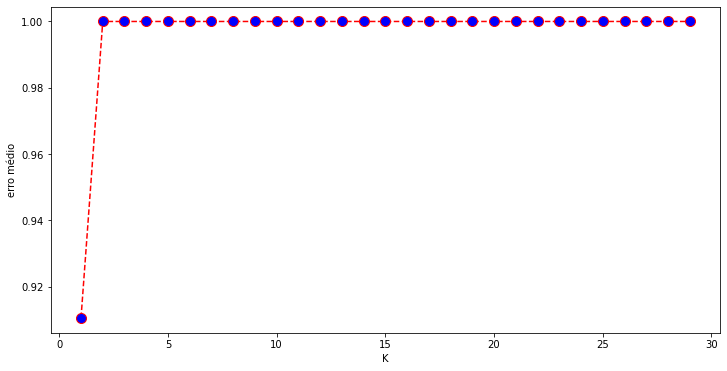

In [37]:
plt.figure(figsize=(12,6))
plt.plot(range(1,30), error, color='red', linestyle='dashed',marker='o',markerfacecolor='blue',markersize=10)
plt.xlabel('K')
plt.ylabel('erro médio')

Text(0, 0.5, 'r²')

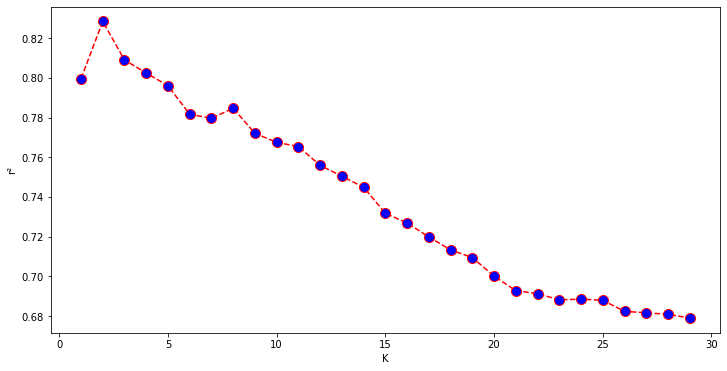

In [38]:
plt.figure(figsize=(12,6))
plt.plot(range(1,30), r2, color='red', linestyle='dashed',marker='o',markerfacecolor='blue',markersize=10)
plt.xlabel('K')
plt.ylabel('r²')

In [39]:
# Construindo um modelo
knn = KNeighborsRegressor(n_neighbors = 4)

# Train and Test the model
knn_resultsDf = train_test_model(knn, 'KNeighborsRegressor4', X_train, X_test, y_train, y_test, 'none', 10, 'yes')
resultsDf = pd.concat([resultsDf, knn_resultsDf])
resultsDf

Modelo: KNeighborsRegressor(n_neighbors=4)
--------------------------------------------------------
--------------------------------------------------------


,Método,R²,RMSE,Acurácia Treino,Acurácia Teste
1,LinearRegression,0.7037271,8.6840742,0.7266022,0.7037271
2,Ridge,0.8045394,7.0535418,0.8126396,0.8045394
3,Lasso,0.7741950,7.5813122,0.7884693,0.7741950
0,Polinomio 1° grau,0.8045347,7.0536265,0.8126429,0.8045347
1,Polinomio 2° grau,0.8545316,6.0850193,0.8844317,0.8545316
2,Polinomio 3° grau,0.8646840,5.8688388,0.9484564,0.8646840
3,Polinomio 4° grau,-74.5252993,138.6512539,0.9914714,-74.5252993
4,Polinomio 5° grau,-180906476761501440.0000000,6785855879.2165422,0.9949591,-180906476761501440.0000000
10,KNeighborsRegressor4,0.8113088,6.9303209,0.9137933,0.8113088


### 5.5 O resto dos modelos

Modelo: SVR(kernel='linear')
--------------------------------------------------------
A interceptação do modelo é: [35.49139025] 

O coeficiente para clinquer é: 8.199665617187392
O coeficiente para escoria é: 4.759485511890736
O coeficiente para cinzas é: 0.8276935696023511
O coeficiente para agua é: -4.727223484329558
O coeficiente para superplastificante é: 1.8503052486303702
O coeficiente para agragado grosso é: -0.7175766443099878
O coeficiente para agregado fino é: -1.5442832751423747
O coeficiente para idade é: 9.899198638868564
--------------------------------------------------------
[[ 8.19966562  4.75948551  0.82769357 -4.72722348  1.85030525 -0.71757664
  -1.54428328  9.89919864]]
Modelo: DecisionTreeRegressor(random_state=0)
--------------------------------------------------------
--------------------------------------------------------
Modelo: RandomForestRegressor(random_state=0)
--------------------------------------------------------
------------------------------------

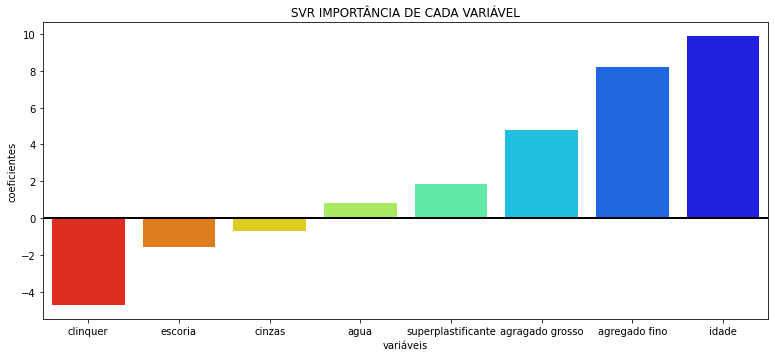

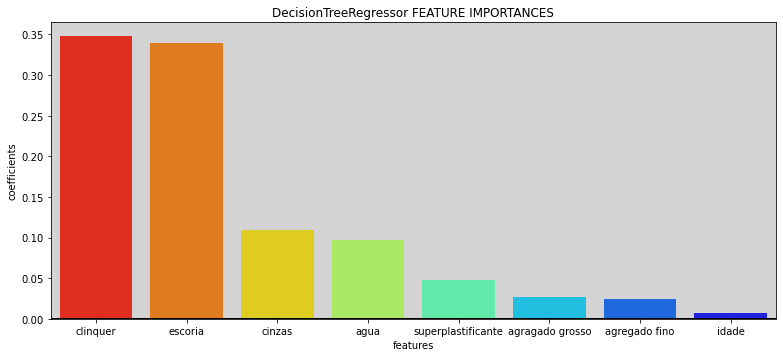

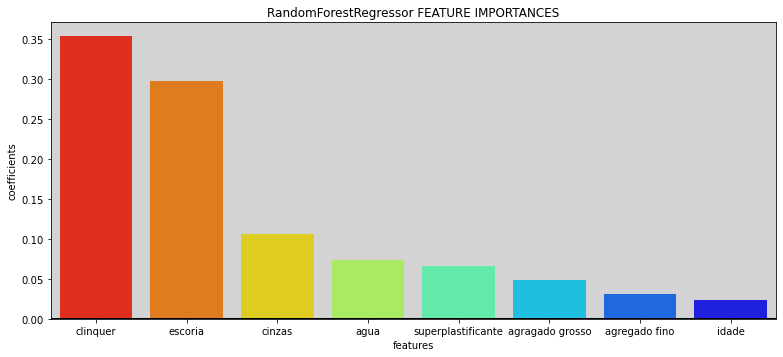

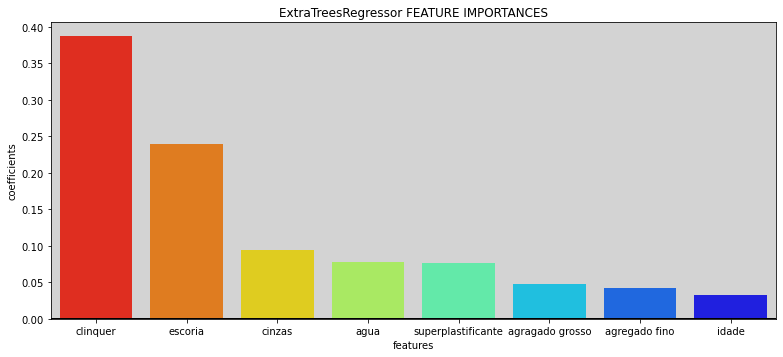

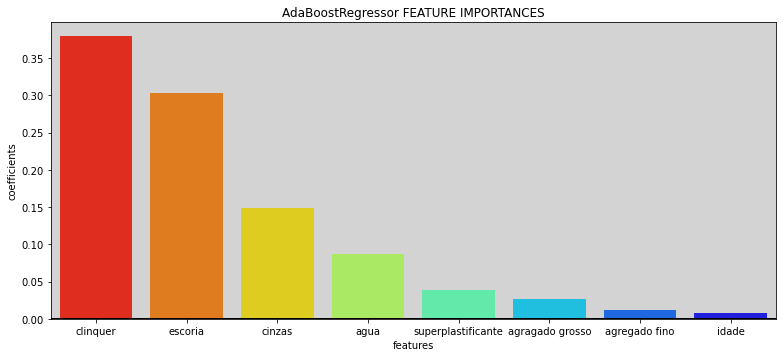

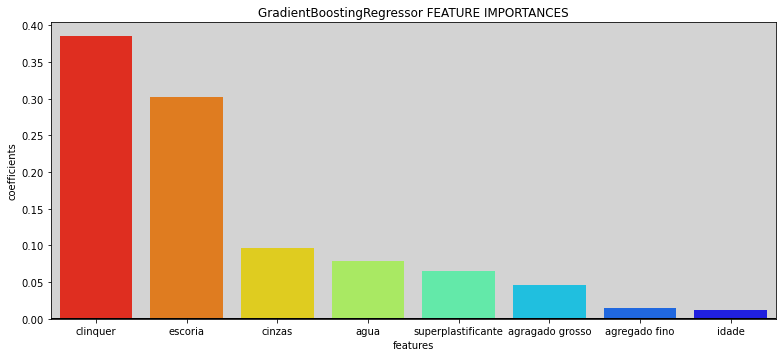

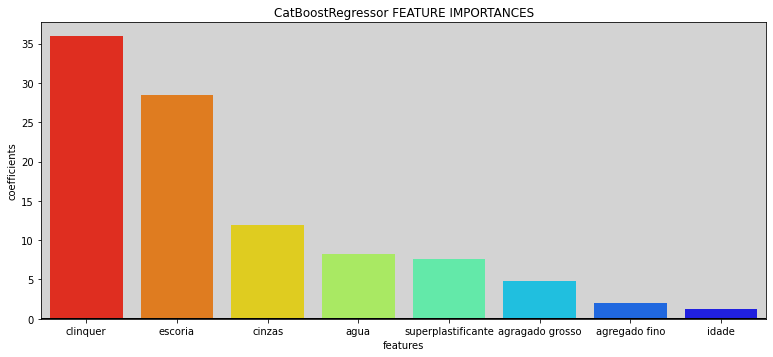

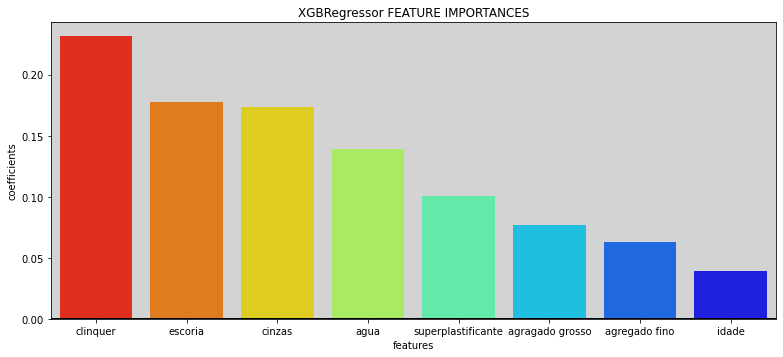

In [40]:
# Definindo os modelos de regressão
modelos=[
    ['SVR',SVR(kernel='linear')],
    ['DecisionTreeRegressor', DecisionTreeRegressor(random_state = 0)],
    ['RandomForestRegressor',RandomForestRegressor(random_state = 0)],
    ['BaggingRegressor',BaggingRegressor(random_state = 0)],
    ['ExtraTreesRegressor',ExtraTreesRegressor(random_state = 0)],
    ['AdaBoostRegressor',AdaBoostRegressor(random_state = 0)],
    ['GradientBoostingRegressor',GradientBoostingRegressor(random_state = 0)],
    ['CatBoostRegressor',CatBoostRegressor(random_state = 0, verbose=False,depth=4,l2_leaf_reg=9,learning_rate=0.03)],
    ['XGBRegressor',XGBRegressor()]
]


i = 11
for name, regressor in modelos:
    if name == 'SVR':
        # treino e teste do modelo
        svr_resultsDf = train_test_model(regressor, name, X_train, X_test, y_train, y_test, 'coef', i, 'yes')

        # guardando as métricas para comparação
        resultsDf = pd.concat([resultsDf, svr_resultsDf])
    elif name == 'BaggingRegressor':
        # Treino e teste do modelo
        bag_resultsDf = train_test_model(regressor, name, X_train, X_test, y_train, y_test, 'none', i, 'yes')

        # treino e teste do modelo
        resultsDf = pd.concat([resultsDf, bag_resultsDf])
    else:
        # treino e teste do modelo
        ensemble_resultsDf = train_test_model(regressor, name, X_train, X_test, y_train, y_test, 'feat', i, 'yes')

        # guardando as métricas para comparação
        resultsDf = pd.concat([resultsDf, ensemble_resultsDf])
    i = i+1

In [41]:
resultsDf

,Método,R²,RMSE,Acurácia Treino,Acurácia Teste
1,LinearRegression,0.7037271,8.6840742,0.7266022,0.7037271
2,Ridge,0.8045394,7.0535418,0.8126396,0.8045394
3,Lasso,0.7741950,7.5813122,0.7884693,0.7741950
0,Polinomio 1° grau,0.8045347,7.0536265,0.8126429,0.8045347
1,Polinomio 2° grau,0.8545316,6.0850193,0.8844317,0.8545316
2,Polinomio 3° grau,0.8646840,5.8688388,0.9484564,0.8646840
3,Polinomio 4° grau,-74.5252993,138.6512539,0.9914714,-74.5252993
4,Polinomio 5° grau,-180906476761501440.0000000,6785855879.2165422,0.9949591,-180906476761501440.0000000
10,KNeighborsRegressor4,0.8113088,6.9303209,0.9137933,0.8113088
11,SVR,0.8054043,7.0379171,0.8109066,0.8054043


### 5.6 Comparando o resto dos modelos com feature selection do lasso

Nessa etapa, vamos selecionar as 5 variáveis mais relevantes seguindo os modelos do tipo ensemble, mostrados acima

In [42]:
# Seleciona as top 5 variáveis
X_feat = concrete_df[['clinquer', 'escoria', 'cinzas', 'agua', 'superplastificante']]
y = concrete_df['resistencia']

# Dividindo em treino e teste
X_train_feat, X_test_feat, y_train, y_test = train_test_split(X_feat, y, test_size = 0.30, random_state = 1)

In [43]:
# Treinando e testando todos os modelos
train_test_allmodels(X_train_feat, X_test_feat, y_train, y_test, 'yes')

Modelo: LinearRegression()
--------------------------------------------------------
--------------------------------------------------------
Modelo: Ridge(random_state=0)
--------------------------------------------------------
--------------------------------------------------------
Modelo: Lasso(random_state=0)
--------------------------------------------------------
--------------------------------------------------------
Modelo: KNeighborsRegressor(n_neighbors=3)
--------------------------------------------------------
--------------------------------------------------------
Modelo: SVR(kernel='linear')
--------------------------------------------------------
--------------------------------------------------------
Modelo: RandomForestRegressor(random_state=0)
--------------------------------------------------------
--------------------------------------------------------
Modelo: BaggingRegressor(random_state=0)
--------------------------------------------------------
-------------

,Método,R²,RMSE,Acurácia Treino,Acurácia Teste
1,LinearRegression,0.3318592,12.4603390,0.4741761,0.3318592
2,Ridge,0.3321654,12.4574840,0.4741743,0.3321654
3,Lasso,0.3367107,12.4150186,0.4595824,0.3367107
4,KNeighborsRegressor,0.2926870,12.8204036,0.6113894,0.2926870
5,SVR,0.3189083,12.5805227,0.4702323,0.3189083
6,RandomForestRegressor,0.3132243,12.6329080,0.6804857,0.3132243
7,BaggingRegressor,0.3088575,12.6730074,0.6690258,0.3088575
8,ExtraTreesRegressor,0.2590932,13.1213243,0.6884115,0.2590932
9,AdaBoostRegressor,0.3962449,11.8447608,0.5233322,0.3962449
10,GradientBoostingRegressor,0.3974072,11.8333535,0.6470921,0.3974072


### 5.7 Otimização do modelo CatBoostRegressor (Ajuste dos hiperparâmetros)

In [44]:
catb_param_grid = {'depth': [4, 7, 10],
                  'learning_rate' : [0.03, 0.1, 0.15],
                  'l2_leaf_reg': [1,4,9],
                  'iterations': [300]}

catb_best_estimator = hyperparameterstune_model('CatBoostRegressor', CatBoostRegressor(verbose=False, random_state=0), X_train, y_train, catb_param_grid)

CatBoostRegressor - Least: RMSE 16.904059 using {'depth': 4, 'iterations': 300, 'l2_leaf_reg': 9, 'learning_rate': 0.03}
Total duration 421.8248484134674 



#### 5.7.1 Testando o modelo com os hiperparâmetros otimizados

Modelo: <catboost.core.CatBoostRegressor object at 0x00000225F0AB1DC0>
--------------------------------------------------------
--------------------------------------------------------


,Método,R²,RMSE,Acurácia Treino,Acurácia Teste
20,CatBoostRegressor,-0.3464688,17.6886229,0.6657577,-0.3464688


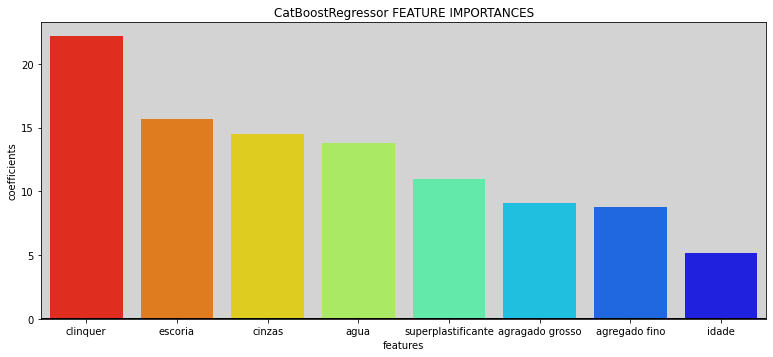

In [45]:
#model_otimized = CatBoostRegressor(depth=4,l2_leaf_reg=9,learning_rate=0.03)
ensemble_resultsDf_ = train_test_model(CatBoostRegressor(random_state = 0, verbose=False)
                                       , 'CatBoostRegressor', X_train, X_test, y_train, y_test, 'feat', 20, 'yes')
ensemble_resultsDf_